In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

In [2]:
data=read_csv("diabetes.csv")

In [3]:
# Store column names before converting to NumPy array:
column_names = data.columns  # Store column names
array = data.values

In [4]:
data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [5]:
array = data.values
X = array[:, 0:-1]
Y = array[:, -1]

In [6]:
scaler = MinMaxScaler()
scaler.fit(X)

X=scaler.transform(X)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier  # Corrected import statement
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
# 1. Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred_nb = nb_classifier.predict(x_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)


Naive Bayes Accuracy: 0.7597402597402597


In [10]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter distribution
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions, cv=5, n_iter=20)  # Try 20 random combinations

# Fit the model with cross-validation
random_search.fit(x_train, y_train)

# Get best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_model.predict(x_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy (after tuning):", rf_accuracy)
print("Best hyperparameters:", best_params)


Random Forest Accuracy (after tuning): 0.7402597402597403
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5}


In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter distribution
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(dt_classifier, param_distributions, cv=5, n_iter=20)  # Try 20 random combinations

# Fit the model with cross-validation
random_search.fit(x_train, y_train)

# Get best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_dt = best_model.predict(x_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy (after tuning):", dt_accuracy)
print("Best hyperparameters:", best_params)


Decision Tree Accuracy (after tuning): 0.7012987012987013
Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'gini'}


In [12]:
from sklearn.linear_model import LogisticRegression

# Instantiate and fit the model
logreg_classifier = LogisticRegression(solver='lbfgs', random_state=42)
logreg_classifier.fit(x_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg_classifier.predict(x_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.7402597402597403


In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define hyperparameter distribution
param_distributions = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['auto', 'scale']
}

# Create SVM classifier
svm_classifier = SVC(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(svm_classifier, param_distributions, cv=5, n_iter=20)  # Try 20 random combinations

# Fit the model with cross-validation
random_search.fit(x_train, y_train)

# Get best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_svm = best_model.predict(x_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy (after tuning):", svm_accuracy)
print("Best hyperparameters:", best_params)


SVM Accuracy (after tuning): 0.7077922077922078
Best hyperparameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter distribution
param_distributions = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan']
}

# Create KNN classifier
knn_classifier = KNeighborsClassifier()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(knn_classifier, param_distributions, cv=5, n_iter=20)  # Try 20 random combinations

# Fit the model with cross-validation
random_search.fit(x_train, y_train)

# Get best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_knn = best_model.predict(x_test)

# Evaluate accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy (after tuning):", knn_accuracy)
print("Best hyperparameters:", best_params)


KNN Accuracy (after tuning): 0.7662337662337663
Best hyperparameters: {'n_neighbors': 11, 'metric': 'euclidean'}


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter distribution
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(gbm_classifier, param_distributions, cv=5, n_iter=20)  # Try 20 random combinations

# Fit the model with cross-validation
random_search.fit(x_train, y_train)

# Get best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_gbm = best_model.predict(x_test)

# Evaluate accuracy
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Tree Accuracy (after tuning):", gbm_accuracy)
print("Best hyperparameters:", best_params)


Gradient Boosting Tree Accuracy (after tuning): 0.7662337662337663
Best hyperparameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}


In [16]:
#pip install xgboost

In [17]:
from xgboost import XGBClassifier

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter distribution
param_distributions = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7]
}

# Create XGBoost classifier
xgb_classifier = XGBClassifier()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions, cv=5, n_iter=20)  # Try 20 random combinations

# Fit the model with cross-validation
random_search.fit(x_train, y_train)

# Get best hyperparameters and model
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found using randomized search:")
print(best_params)

print("\nBest accuracy score achieved:")
print(best_score)

# Print detailed results for all combinations, including scores for each fold
print("\nDetailed results for all combinations:")
print(random_search.cv_results_)


Best parameters found using randomized search:
{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05}

Best accuracy score achieved:
0.7751832600293216

Detailed results for all combinations:
{'mean_fit_time': array([0.21179018, 0.1709331 , 0.03736916, 0.05754972, 0.06200509,
       0.09131598, 0.09607196, 0.13521056, 0.12081614, 0.05341191,
       0.10312948, 0.18227701, 0.14928474, 0.10288296, 0.07134819,
       0.14358311, 0.10018783, 0.06517529, 0.07840772, 0.03894873]), 'std_fit_time': array([0.02729886, 0.00611312, 0.00384134, 0.00079881, 0.00394873,
       0.00386942, 0.0055781 , 0.0083288 , 0.0025502 , 0.0034124 ,
       0.00417088, 0.00371092, 0.00400671, 0.00318831, 0.00350519,
       0.00310558, 0.00365011, 0.00081933, 0.00337086, 0.00278464]), 'mean_score_time': array([0.00371041, 0.00497384, 0.00322809, 0.00448756, 0.00020404,
       0.00816073, 0.00324812, 0.003268  , 0.00184765, 0.00346775,
       0.00448723, 0.00351033, 0.00534592, 0.00040727, 0.0047164 ,
       0.

In [19]:
#pip install catboost


In [20]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter distribution
param_distributions = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]  # Add L2 regularization as well
}

# Create CatBoost classifier
catboost_classifier = CatBoostClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(catboost_classifier, param_distributions, cv=5, n_iter=20)  # Try 20 random combinations

# Fit the model with cross-validation
random_search.fit(x_train, y_train)

# Get best hyperparameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found using randomized search:")
print(best_params)

print("\nBest accuracy score achieved:")
print(best_score)


0:	learn: 0.6452547	total: 133ms	remaining: 6.54s
1:	learn: 0.6118373	total: 137ms	remaining: 3.29s
2:	learn: 0.5851055	total: 140ms	remaining: 2.19s
3:	learn: 0.5610790	total: 143ms	remaining: 1.64s
4:	learn: 0.5397898	total: 147ms	remaining: 1.32s
5:	learn: 0.5271914	total: 151ms	remaining: 1.11s
6:	learn: 0.5118120	total: 154ms	remaining: 945ms
7:	learn: 0.4977176	total: 157ms	remaining: 824ms
8:	learn: 0.4878937	total: 160ms	remaining: 730ms
9:	learn: 0.4789183	total: 163ms	remaining: 652ms
10:	learn: 0.4691624	total: 166ms	remaining: 589ms
11:	learn: 0.4617065	total: 170ms	remaining: 538ms
12:	learn: 0.4533559	total: 174ms	remaining: 494ms
13:	learn: 0.4470051	total: 177ms	remaining: 454ms
14:	learn: 0.4393160	total: 179ms	remaining: 419ms
15:	learn: 0.4341901	total: 182ms	remaining: 387ms
16:	learn: 0.4291005	total: 185ms	remaining: 359ms
17:	learn: 0.4252702	total: 187ms	remaining: 333ms
18:	learn: 0.4207158	total: 190ms	remaining: 311ms
19:	learn: 0.4166728	total: 193ms	remaini

0:	learn: 0.6478516	total: 3.57ms	remaining: 175ms
1:	learn: 0.6120720	total: 6.2ms	remaining: 149ms
2:	learn: 0.5838344	total: 8.88ms	remaining: 139ms
3:	learn: 0.5613513	total: 12ms	remaining: 138ms
4:	learn: 0.5409731	total: 14.6ms	remaining: 132ms
5:	learn: 0.5268132	total: 17.2ms	remaining: 126ms
6:	learn: 0.5106394	total: 19.9ms	remaining: 122ms
7:	learn: 0.4957560	total: 22.6ms	remaining: 119ms
8:	learn: 0.4812828	total: 25.7ms	remaining: 117ms
9:	learn: 0.4688510	total: 28.4ms	remaining: 114ms
10:	learn: 0.4558609	total: 31.1ms	remaining: 110ms
11:	learn: 0.4459494	total: 33.6ms	remaining: 106ms
12:	learn: 0.4364253	total: 36.3ms	remaining: 103ms
13:	learn: 0.4287140	total: 39.4ms	remaining: 101ms
14:	learn: 0.4215182	total: 42ms	remaining: 98ms
15:	learn: 0.4158621	total: 44.8ms	remaining: 95.2ms
16:	learn: 0.4107707	total: 47.4ms	remaining: 92.1ms
17:	learn: 0.4033378	total: 50.4ms	remaining: 89.6ms
18:	learn: 0.3978723	total: 52.9ms	remaining: 86.3ms
19:	learn: 0.3923250	tot

111:	learn: 0.4058371	total: 193ms	remaining: 65.4ms
112:	learn: 0.4052469	total: 195ms	remaining: 63.9ms
113:	learn: 0.4047789	total: 197ms	remaining: 62.1ms
114:	learn: 0.4040478	total: 198ms	remaining: 60.3ms
115:	learn: 0.4037924	total: 199ms	remaining: 58.5ms
116:	learn: 0.4030319	total: 201ms	remaining: 56.8ms
117:	learn: 0.4022918	total: 203ms	remaining: 54.9ms
118:	learn: 0.4019734	total: 204ms	remaining: 53.3ms
119:	learn: 0.4016206	total: 206ms	remaining: 51.5ms
120:	learn: 0.4008882	total: 207ms	remaining: 49.7ms
121:	learn: 0.4004835	total: 209ms	remaining: 47.9ms
122:	learn: 0.4001987	total: 210ms	remaining: 46.1ms
123:	learn: 0.3998487	total: 212ms	remaining: 44.4ms
124:	learn: 0.3994397	total: 213ms	remaining: 42.6ms
125:	learn: 0.3989214	total: 214ms	remaining: 40.8ms
126:	learn: 0.3983557	total: 215ms	remaining: 39ms
127:	learn: 0.3975380	total: 217ms	remaining: 37.3ms
128:	learn: 0.3970712	total: 219ms	remaining: 35.6ms
129:	learn: 0.3968015	total: 222ms	remaining: 34

149:	learn: 0.3814859	total: 272ms	remaining: 0us
0:	learn: 0.6788783	total: 1.61ms	remaining: 241ms
1:	learn: 0.6659373	total: 3.13ms	remaining: 231ms
2:	learn: 0.6539333	total: 4.5ms	remaining: 221ms
3:	learn: 0.6426706	total: 5.88ms	remaining: 215ms
4:	learn: 0.6339745	total: 7.44ms	remaining: 216ms
5:	learn: 0.6251033	total: 8.94ms	remaining: 214ms
6:	learn: 0.6155527	total: 10.4ms	remaining: 212ms
7:	learn: 0.6070449	total: 11.8ms	remaining: 209ms
8:	learn: 0.5989980	total: 13.4ms	remaining: 210ms
9:	learn: 0.5924370	total: 15ms	remaining: 209ms
10:	learn: 0.5853800	total: 16.4ms	remaining: 207ms
11:	learn: 0.5800204	total: 17.9ms	remaining: 205ms
12:	learn: 0.5728445	total: 19.5ms	remaining: 205ms
13:	learn: 0.5667092	total: 20.9ms	remaining: 203ms
14:	learn: 0.5622829	total: 22.5ms	remaining: 202ms
15:	learn: 0.5576722	total: 24.5ms	remaining: 205ms
16:	learn: 0.5518361	total: 26.2ms	remaining: 205ms
17:	learn: 0.5474259	total: 27.7ms	remaining: 203ms
18:	learn: 0.5435425	total:

9:	learn: 0.5837348	total: 16.2ms	remaining: 227ms
10:	learn: 0.5765641	total: 18ms	remaining: 227ms
11:	learn: 0.5706177	total: 20.1ms	remaining: 231ms
12:	learn: 0.5624805	total: 21.9ms	remaining: 231ms
13:	learn: 0.5567611	total: 24ms	remaining: 233ms
14:	learn: 0.5524321	total: 25.7ms	remaining: 231ms
15:	learn: 0.5474383	total: 27.4ms	remaining: 229ms
16:	learn: 0.5425402	total: 29ms	remaining: 227ms
17:	learn: 0.5377354	total: 30.7ms	remaining: 225ms
18:	learn: 0.5334791	total: 32.4ms	remaining: 223ms
19:	learn: 0.5288002	total: 34.1ms	remaining: 222ms
20:	learn: 0.5250065	total: 35.7ms	remaining: 220ms
21:	learn: 0.5212674	total: 37.8ms	remaining: 220ms
22:	learn: 0.5170811	total: 39.4ms	remaining: 218ms
23:	learn: 0.5130239	total: 41.5ms	remaining: 218ms
24:	learn: 0.5093274	total: 43.2ms	remaining: 216ms
25:	learn: 0.5065990	total: 45.7ms	remaining: 218ms
26:	learn: 0.5030477	total: 47.7ms	remaining: 217ms
27:	learn: 0.5002928	total: 49.5ms	remaining: 216ms
28:	learn: 0.497697

44:	learn: 0.4538410	total: 92.2ms	remaining: 215ms
45:	learn: 0.4522460	total: 94.5ms	remaining: 214ms
46:	learn: 0.4505778	total: 97.1ms	remaining: 213ms
47:	learn: 0.4496493	total: 99.8ms	remaining: 212ms
48:	learn: 0.4482542	total: 102ms	remaining: 210ms
49:	learn: 0.4465702	total: 104ms	remaining: 208ms
50:	learn: 0.4449035	total: 107ms	remaining: 207ms
51:	learn: 0.4431563	total: 109ms	remaining: 205ms
52:	learn: 0.4417204	total: 110ms	remaining: 202ms
53:	learn: 0.4405247	total: 112ms	remaining: 199ms
54:	learn: 0.4392982	total: 114ms	remaining: 197ms
55:	learn: 0.4388095	total: 116ms	remaining: 194ms
56:	learn: 0.4376459	total: 117ms	remaining: 191ms
57:	learn: 0.4363949	total: 119ms	remaining: 189ms
58:	learn: 0.4350019	total: 121ms	remaining: 187ms
59:	learn: 0.4335456	total: 123ms	remaining: 185ms
60:	learn: 0.4316735	total: 125ms	remaining: 183ms
61:	learn: 0.4300744	total: 127ms	remaining: 180ms
62:	learn: 0.4289719	total: 129ms	remaining: 178ms
63:	learn: 0.4281196	total:

56:	learn: 0.3030319	total: 323ms	remaining: 527ms
57:	learn: 0.3000354	total: 329ms	remaining: 522ms
58:	learn: 0.2973084	total: 335ms	remaining: 516ms
59:	learn: 0.2955228	total: 341ms	remaining: 511ms
60:	learn: 0.2929584	total: 346ms	remaining: 505ms
61:	learn: 0.2901560	total: 352ms	remaining: 500ms
62:	learn: 0.2885305	total: 358ms	remaining: 495ms
63:	learn: 0.2867866	total: 363ms	remaining: 488ms
64:	learn: 0.2844592	total: 369ms	remaining: 483ms
65:	learn: 0.2828448	total: 375ms	remaining: 477ms
66:	learn: 0.2800528	total: 380ms	remaining: 471ms
67:	learn: 0.2785125	total: 385ms	remaining: 465ms
68:	learn: 0.2755881	total: 391ms	remaining: 459ms
69:	learn: 0.2743816	total: 396ms	remaining: 453ms
70:	learn: 0.2722061	total: 402ms	remaining: 448ms
71:	learn: 0.2701408	total: 407ms	remaining: 441ms
72:	learn: 0.2681087	total: 413ms	remaining: 435ms
73:	learn: 0.2663071	total: 419ms	remaining: 430ms
74:	learn: 0.2646986	total: 426ms	remaining: 426ms
75:	learn: 0.2618594	total: 432

100:	learn: 0.2133818	total: 394ms	remaining: 191ms
101:	learn: 0.2107713	total: 398ms	remaining: 187ms
102:	learn: 0.2092679	total: 402ms	remaining: 183ms
103:	learn: 0.2078157	total: 406ms	remaining: 180ms
104:	learn: 0.2064332	total: 410ms	remaining: 176ms
105:	learn: 0.2055473	total: 413ms	remaining: 172ms
106:	learn: 0.2044258	total: 417ms	remaining: 168ms
107:	learn: 0.2027830	total: 421ms	remaining: 164ms
108:	learn: 0.2011036	total: 425ms	remaining: 160ms
109:	learn: 0.1996944	total: 429ms	remaining: 156ms
110:	learn: 0.1976791	total: 433ms	remaining: 152ms
111:	learn: 0.1963451	total: 436ms	remaining: 148ms
112:	learn: 0.1954965	total: 440ms	remaining: 144ms
113:	learn: 0.1948223	total: 443ms	remaining: 140ms
114:	learn: 0.1928048	total: 447ms	remaining: 136ms
115:	learn: 0.1909662	total: 450ms	remaining: 132ms
116:	learn: 0.1894038	total: 454ms	remaining: 128ms
117:	learn: 0.1874489	total: 457ms	remaining: 124ms
118:	learn: 0.1864768	total: 461ms	remaining: 120ms
119:	learn: 

116:	learn: 0.1931133	total: 743ms	remaining: 210ms
117:	learn: 0.1913952	total: 750ms	remaining: 203ms
118:	learn: 0.1896512	total: 756ms	remaining: 197ms
119:	learn: 0.1884636	total: 762ms	remaining: 191ms
120:	learn: 0.1865244	total: 768ms	remaining: 184ms
121:	learn: 0.1849611	total: 778ms	remaining: 179ms
122:	learn: 0.1840111	total: 786ms	remaining: 172ms
123:	learn: 0.1829330	total: 792ms	remaining: 166ms
124:	learn: 0.1815219	total: 799ms	remaining: 160ms
125:	learn: 0.1799225	total: 806ms	remaining: 154ms
126:	learn: 0.1791740	total: 813ms	remaining: 147ms
127:	learn: 0.1782114	total: 820ms	remaining: 141ms
128:	learn: 0.1768545	total: 826ms	remaining: 134ms
129:	learn: 0.1755363	total: 832ms	remaining: 128ms
130:	learn: 0.1740154	total: 839ms	remaining: 122ms
131:	learn: 0.1733568	total: 845ms	remaining: 115ms
132:	learn: 0.1721741	total: 852ms	remaining: 109ms
133:	learn: 0.1715097	total: 858ms	remaining: 102ms
134:	learn: 0.1704030	total: 865ms	remaining: 96.1ms
135:	learn:

144:	learn: 0.1618571	total: 515ms	remaining: 17.8ms
145:	learn: 0.1601546	total: 519ms	remaining: 14.2ms
146:	learn: 0.1594446	total: 522ms	remaining: 10.7ms
147:	learn: 0.1586378	total: 526ms	remaining: 7.11ms
148:	learn: 0.1577712	total: 530ms	remaining: 3.55ms
149:	learn: 0.1572664	total: 533ms	remaining: 0us
0:	learn: 0.6631190	total: 3.9ms	remaining: 580ms
1:	learn: 0.6354658	total: 7.4ms	remaining: 548ms
2:	learn: 0.6089627	total: 11ms	remaining: 540ms
3:	learn: 0.5867602	total: 15ms	remaining: 547ms
4:	learn: 0.5664958	total: 18.6ms	remaining: 541ms
5:	learn: 0.5514546	total: 22.1ms	remaining: 531ms
6:	learn: 0.5352689	total: 25.7ms	remaining: 525ms
7:	learn: 0.5209980	total: 29.3ms	remaining: 520ms
8:	learn: 0.5087517	total: 31.6ms	remaining: 495ms
9:	learn: 0.4953732	total: 35.2ms	remaining: 493ms
10:	learn: 0.4839955	total: 38.8ms	remaining: 491ms
11:	learn: 0.4755197	total: 42.3ms	remaining: 487ms
12:	learn: 0.4652866	total: 46ms	remaining: 484ms
13:	learn: 0.4550781	total:

47:	learn: 0.2785947	total: 176ms	remaining: 7.34ms
48:	learn: 0.2729913	total: 180ms	remaining: 3.67ms
49:	learn: 0.2697995	total: 184ms	remaining: 0us
0:	learn: 0.6480570	total: 4.79ms	remaining: 235ms
1:	learn: 0.6117117	total: 9.81ms	remaining: 235ms
2:	learn: 0.5774390	total: 16ms	remaining: 251ms
3:	learn: 0.5533172	total: 22.2ms	remaining: 255ms
4:	learn: 0.5320688	total: 27.7ms	remaining: 250ms
5:	learn: 0.5141443	total: 33.3ms	remaining: 244ms
6:	learn: 0.4961712	total: 38.5ms	remaining: 237ms
7:	learn: 0.4801392	total: 43.6ms	remaining: 229ms
8:	learn: 0.4659987	total: 48.6ms	remaining: 221ms
9:	learn: 0.4535143	total: 53.4ms	remaining: 214ms
10:	learn: 0.4421269	total: 58.6ms	remaining: 208ms
11:	learn: 0.4333565	total: 63.7ms	remaining: 202ms
12:	learn: 0.4226608	total: 68.6ms	remaining: 195ms
13:	learn: 0.4110411	total: 74.7ms	remaining: 192ms
14:	learn: 0.4008119	total: 79.8ms	remaining: 186ms
15:	learn: 0.3934555	total: 84.9ms	remaining: 180ms
16:	learn: 0.3867812	total:

7:	learn: 0.4735922	total: 52.1ms	remaining: 273ms
8:	learn: 0.4590231	total: 56.5ms	remaining: 258ms
9:	learn: 0.4456180	total: 62.8ms	remaining: 251ms
10:	learn: 0.4352361	total: 69.4ms	remaining: 246ms
11:	learn: 0.4230877	total: 76ms	remaining: 241ms
12:	learn: 0.4122233	total: 82.8ms	remaining: 236ms
13:	learn: 0.4038373	total: 90.1ms	remaining: 232ms
14:	learn: 0.3949134	total: 96.1ms	remaining: 224ms
15:	learn: 0.3859623	total: 102ms	remaining: 218ms
16:	learn: 0.3803004	total: 109ms	remaining: 211ms
17:	learn: 0.3731091	total: 115ms	remaining: 204ms
18:	learn: 0.3670392	total: 121ms	remaining: 198ms
19:	learn: 0.3589371	total: 128ms	remaining: 192ms
20:	learn: 0.3544286	total: 134ms	remaining: 185ms
21:	learn: 0.3484441	total: 140ms	remaining: 178ms
22:	learn: 0.3435832	total: 146ms	remaining: 171ms
23:	learn: 0.3354964	total: 153ms	remaining: 166ms
24:	learn: 0.3308035	total: 159ms	remaining: 159ms
25:	learn: 0.3268820	total: 165ms	remaining: 153ms
26:	learn: 0.3248052	total: 

26:	learn: 0.5310226	total: 169ms	remaining: 144ms
27:	learn: 0.5281609	total: 175ms	remaining: 137ms
28:	learn: 0.5250213	total: 181ms	remaining: 131ms
29:	learn: 0.5221848	total: 188ms	remaining: 125ms
30:	learn: 0.5187911	total: 194ms	remaining: 119ms
31:	learn: 0.5151961	total: 200ms	remaining: 113ms
32:	learn: 0.5123387	total: 207ms	remaining: 107ms
33:	learn: 0.5092320	total: 213ms	remaining: 100ms
34:	learn: 0.5057930	total: 219ms	remaining: 94ms
35:	learn: 0.5026946	total: 226ms	remaining: 87.9ms
36:	learn: 0.5000742	total: 232ms	remaining: 81.5ms
37:	learn: 0.4976954	total: 239ms	remaining: 75.4ms
38:	learn: 0.4948224	total: 245ms	remaining: 69.2ms
39:	learn: 0.4920259	total: 251ms	remaining: 62.9ms
40:	learn: 0.4891778	total: 258ms	remaining: 56.6ms
41:	learn: 0.4863598	total: 264ms	remaining: 50.2ms
42:	learn: 0.4839964	total: 269ms	remaining: 43.8ms
43:	learn: 0.4819950	total: 275ms	remaining: 37.5ms
44:	learn: 0.4797408	total: 280ms	remaining: 31.1ms
45:	learn: 0.4775154	t

78:	learn: 0.4411195	total: 131ms	remaining: 118ms
79:	learn: 0.4401077	total: 132ms	remaining: 115ms
80:	learn: 0.4395461	total: 133ms	remaining: 113ms
81:	learn: 0.4390149	total: 134ms	remaining: 111ms
82:	learn: 0.4385308	total: 135ms	remaining: 109ms
83:	learn: 0.4377328	total: 136ms	remaining: 107ms
84:	learn: 0.4368624	total: 137ms	remaining: 105ms
85:	learn: 0.4361810	total: 138ms	remaining: 103ms
86:	learn: 0.4354890	total: 139ms	remaining: 101ms
87:	learn: 0.4348516	total: 140ms	remaining: 98.8ms
88:	learn: 0.4346703	total: 141ms	remaining: 96.9ms
89:	learn: 0.4341838	total: 142ms	remaining: 95ms
90:	learn: 0.4336701	total: 143ms	remaining: 93ms
91:	learn: 0.4327487	total: 144ms	remaining: 91ms
92:	learn: 0.4323952	total: 145ms	remaining: 89.1ms
93:	learn: 0.4315155	total: 146ms	remaining: 87.2ms
94:	learn: 0.4309860	total: 147ms	remaining: 85.3ms
95:	learn: 0.4303013	total: 149ms	remaining: 83.5ms
96:	learn: 0.4296595	total: 150ms	remaining: 81.7ms
97:	learn: 0.4288113	total:

127:	learn: 0.4062168	total: 143ms	remaining: 24.5ms
128:	learn: 0.4061494	total: 144ms	remaining: 23.4ms
129:	learn: 0.4057728	total: 145ms	remaining: 22.3ms
130:	learn: 0.4052212	total: 146ms	remaining: 21.2ms
131:	learn: 0.4046309	total: 148ms	remaining: 20.1ms
132:	learn: 0.4043641	total: 149ms	remaining: 19ms
133:	learn: 0.4041704	total: 150ms	remaining: 17.9ms
134:	learn: 0.4039723	total: 151ms	remaining: 16.7ms
135:	learn: 0.4034198	total: 152ms	remaining: 15.6ms
136:	learn: 0.4030701	total: 153ms	remaining: 14.5ms
137:	learn: 0.4027270	total: 154ms	remaining: 13.4ms
138:	learn: 0.4023714	total: 155ms	remaining: 12.2ms
139:	learn: 0.4018283	total: 156ms	remaining: 11.1ms
140:	learn: 0.4016494	total: 157ms	remaining: 10ms
141:	learn: 0.4014105	total: 158ms	remaining: 8.9ms
142:	learn: 0.4008485	total: 159ms	remaining: 7.79ms
143:	learn: 0.4002792	total: 160ms	remaining: 6.69ms
144:	learn: 0.3999199	total: 161ms	remaining: 5.57ms
145:	learn: 0.3994966	total: 162ms	remaining: 4.45m

1:	learn: 0.6658404	total: 4.75ms	remaining: 351ms
2:	learn: 0.6543676	total: 6.45ms	remaining: 316ms
3:	learn: 0.6417856	total: 8.98ms	remaining: 328ms
4:	learn: 0.6328066	total: 10.8ms	remaining: 312ms
5:	learn: 0.6223685	total: 12.5ms	remaining: 300ms
6:	learn: 0.6137137	total: 14.9ms	remaining: 305ms
7:	learn: 0.6046214	total: 16.6ms	remaining: 295ms
8:	learn: 0.5971784	total: 18.3ms	remaining: 287ms
9:	learn: 0.5903244	total: 20.4ms	remaining: 286ms
10:	learn: 0.5837000	total: 22.1ms	remaining: 279ms
11:	learn: 0.5781463	total: 23.8ms	remaining: 274ms
12:	learn: 0.5710912	total: 26ms	remaining: 275ms
13:	learn: 0.5655211	total: 27.7ms	remaining: 269ms
14:	learn: 0.5612042	total: 29.6ms	remaining: 266ms
15:	learn: 0.5559804	total: 31.7ms	remaining: 265ms
16:	learn: 0.5509909	total: 33.4ms	remaining: 261ms
17:	learn: 0.5462952	total: 35.1ms	remaining: 258ms
18:	learn: 0.5419477	total: 37.1ms	remaining: 256ms
19:	learn: 0.5374083	total: 38.8ms	remaining: 252ms
20:	learn: 0.5325433	to

18:	learn: 0.5378455	total: 34.6ms	remaining: 238ms
19:	learn: 0.5326513	total: 36.6ms	remaining: 238ms
20:	learn: 0.5293023	total: 38.7ms	remaining: 238ms
21:	learn: 0.5245726	total: 40.5ms	remaining: 236ms
22:	learn: 0.5206185	total: 42.2ms	remaining: 233ms
23:	learn: 0.5177971	total: 43.9ms	remaining: 231ms
24:	learn: 0.5141572	total: 45.7ms	remaining: 229ms
25:	learn: 0.5096717	total: 47.7ms	remaining: 228ms
26:	learn: 0.5060637	total: 49.3ms	remaining: 225ms
27:	learn: 0.5033519	total: 51ms	remaining: 222ms
28:	learn: 0.4998381	total: 52.7ms	remaining: 220ms
29:	learn: 0.4972998	total: 54.6ms	remaining: 219ms
30:	learn: 0.4940643	total: 56.4ms	remaining: 217ms
31:	learn: 0.4918998	total: 58.6ms	remaining: 216ms
32:	learn: 0.4887175	total: 60.3ms	remaining: 214ms
33:	learn: 0.4866673	total: 62ms	remaining: 212ms
34:	learn: 0.4850768	total: 63.9ms	remaining: 210ms
35:	learn: 0.4828832	total: 65.8ms	remaining: 208ms
36:	learn: 0.4805665	total: 67.4ms	remaining: 206ms
37:	learn: 0.478

36:	learn: 0.4297605	total: 250ms	remaining: 764ms
37:	learn: 0.4264066	total: 259ms	remaining: 763ms
38:	learn: 0.4242681	total: 266ms	remaining: 758ms
39:	learn: 0.4214526	total: 273ms	remaining: 750ms
40:	learn: 0.4191465	total: 280ms	remaining: 743ms
41:	learn: 0.4169869	total: 286ms	remaining: 736ms
42:	learn: 0.4144390	total: 293ms	remaining: 730ms
43:	learn: 0.4122753	total: 304ms	remaining: 733ms
44:	learn: 0.4104230	total: 310ms	remaining: 723ms
45:	learn: 0.4084635	total: 315ms	remaining: 713ms
46:	learn: 0.4065965	total: 321ms	remaining: 703ms
47:	learn: 0.4042764	total: 325ms	remaining: 690ms
48:	learn: 0.4018297	total: 330ms	remaining: 681ms
49:	learn: 0.3995595	total: 335ms	remaining: 670ms
50:	learn: 0.3981258	total: 339ms	remaining: 658ms
51:	learn: 0.3956390	total: 344ms	remaining: 649ms
52:	learn: 0.3934381	total: 349ms	remaining: 639ms
53:	learn: 0.3915112	total: 353ms	remaining: 628ms
54:	learn: 0.3900456	total: 358ms	remaining: 619ms
55:	learn: 0.3887408	total: 363

83:	learn: 0.3284603	total: 371ms	remaining: 291ms
84:	learn: 0.3269031	total: 375ms	remaining: 287ms
85:	learn: 0.3251321	total: 379ms	remaining: 282ms
86:	learn: 0.3227864	total: 383ms	remaining: 278ms
87:	learn: 0.3212577	total: 388ms	remaining: 273ms
88:	learn: 0.3197718	total: 392ms	remaining: 269ms
89:	learn: 0.3192513	total: 397ms	remaining: 264ms
90:	learn: 0.3172911	total: 401ms	remaining: 260ms
91:	learn: 0.3163921	total: 405ms	remaining: 255ms
92:	learn: 0.3153775	total: 409ms	remaining: 251ms
93:	learn: 0.3144475	total: 414ms	remaining: 246ms
94:	learn: 0.3122680	total: 417ms	remaining: 242ms
95:	learn: 0.3108990	total: 422ms	remaining: 237ms
96:	learn: 0.3096306	total: 426ms	remaining: 233ms
97:	learn: 0.3072115	total: 430ms	remaining: 228ms
98:	learn: 0.3056997	total: 434ms	remaining: 224ms
99:	learn: 0.3047537	total: 438ms	remaining: 219ms
100:	learn: 0.3040430	total: 442ms	remaining: 215ms
101:	learn: 0.3034506	total: 446ms	remaining: 210ms
102:	learn: 0.3020311	total: 

109:	learn: 0.3076266	total: 490ms	remaining: 178ms
110:	learn: 0.3069097	total: 495ms	remaining: 174ms
111:	learn: 0.3067054	total: 499ms	remaining: 169ms
112:	learn: 0.3065620	total: 504ms	remaining: 165ms
113:	learn: 0.3063081	total: 508ms	remaining: 160ms
114:	learn: 0.3044794	total: 512ms	remaining: 156ms
115:	learn: 0.3035391	total: 517ms	remaining: 152ms
116:	learn: 0.3028934	total: 522ms	remaining: 147ms
117:	learn: 0.3023821	total: 526ms	remaining: 143ms
118:	learn: 0.3014895	total: 530ms	remaining: 138ms
119:	learn: 0.3002090	total: 534ms	remaining: 133ms
120:	learn: 0.3000453	total: 538ms	remaining: 129ms
121:	learn: 0.2989574	total: 542ms	remaining: 124ms
122:	learn: 0.2979944	total: 546ms	remaining: 120ms
123:	learn: 0.2972130	total: 550ms	remaining: 115ms
124:	learn: 0.2958157	total: 554ms	remaining: 111ms
125:	learn: 0.2952824	total: 558ms	remaining: 106ms
126:	learn: 0.2939241	total: 563ms	remaining: 102ms
127:	learn: 0.2937927	total: 567ms	remaining: 97.4ms
128:	learn:

137:	learn: 0.2867314	total: 603ms	remaining: 52.4ms
138:	learn: 0.2858468	total: 607ms	remaining: 48ms
139:	learn: 0.2849788	total: 611ms	remaining: 43.7ms
140:	learn: 0.2848198	total: 615ms	remaining: 39.3ms
141:	learn: 0.2828462	total: 619ms	remaining: 34.9ms
142:	learn: 0.2816260	total: 624ms	remaining: 30.5ms
143:	learn: 0.2802711	total: 628ms	remaining: 26.2ms
144:	learn: 0.2789528	total: 633ms	remaining: 21.8ms
145:	learn: 0.2787873	total: 637ms	remaining: 17.5ms
146:	learn: 0.2787036	total: 642ms	remaining: 13.1ms
147:	learn: 0.2773947	total: 647ms	remaining: 8.74ms
148:	learn: 0.2762980	total: 652ms	remaining: 4.38ms
149:	learn: 0.2748963	total: 657ms	remaining: 0us
0:	learn: 0.6748452	total: 5.88ms	remaining: 876ms
1:	learn: 0.6552932	total: 10.6ms	remaining: 785ms
2:	learn: 0.6361887	total: 15.7ms	remaining: 772ms
3:	learn: 0.6217404	total: 20.6ms	remaining: 753ms
4:	learn: 0.6079082	total: 25.2ms	remaining: 732ms
5:	learn: 0.5966350	total: 31.1ms	remaining: 745ms
6:	learn: 

13:	learn: 0.5233353	total: 91.6ms	remaining: 563ms
14:	learn: 0.5166508	total: 97.8ms	remaining: 554ms
15:	learn: 0.5106315	total: 105ms	remaining: 549ms
16:	learn: 0.5045911	total: 111ms	remaining: 541ms
17:	learn: 0.4993086	total: 117ms	remaining: 532ms
18:	learn: 0.4952805	total: 124ms	remaining: 527ms
19:	learn: 0.4911713	total: 130ms	remaining: 519ms
20:	learn: 0.4851753	total: 137ms	remaining: 514ms
21:	learn: 0.4807175	total: 143ms	remaining: 506ms
22:	learn: 0.4759162	total: 149ms	remaining: 500ms
23:	learn: 0.4709735	total: 155ms	remaining: 491ms
24:	learn: 0.4664065	total: 161ms	remaining: 484ms
25:	learn: 0.4618594	total: 168ms	remaining: 477ms
26:	learn: 0.4587582	total: 174ms	remaining: 470ms
27:	learn: 0.4557972	total: 180ms	remaining: 462ms
28:	learn: 0.4531962	total: 185ms	remaining: 453ms
29:	learn: 0.4508958	total: 190ms	remaining: 444ms
30:	learn: 0.4474874	total: 196ms	remaining: 436ms
31:	learn: 0.4449130	total: 202ms	remaining: 428ms
32:	learn: 0.4419720	total: 2

76:	learn: 0.3363536	total: 427ms	remaining: 127ms
77:	learn: 0.3348175	total: 432ms	remaining: 122ms
78:	learn: 0.3334043	total: 437ms	remaining: 116ms
79:	learn: 0.3314116	total: 442ms	remaining: 111ms
80:	learn: 0.3304761	total: 448ms	remaining: 105ms
81:	learn: 0.3297355	total: 453ms	remaining: 99.5ms
82:	learn: 0.3290097	total: 459ms	remaining: 93.9ms
83:	learn: 0.3284603	total: 464ms	remaining: 88.4ms
84:	learn: 0.3269031	total: 469ms	remaining: 82.8ms
85:	learn: 0.3251321	total: 475ms	remaining: 77.3ms
86:	learn: 0.3227864	total: 480ms	remaining: 71.7ms
87:	learn: 0.3212577	total: 485ms	remaining: 66.1ms
88:	learn: 0.3197718	total: 489ms	remaining: 60.5ms
89:	learn: 0.3192513	total: 495ms	remaining: 55ms
90:	learn: 0.3172911	total: 499ms	remaining: 49.4ms
91:	learn: 0.3163921	total: 504ms	remaining: 43.8ms
92:	learn: 0.3153775	total: 509ms	remaining: 38.3ms
93:	learn: 0.3144475	total: 514ms	remaining: 32.8ms
94:	learn: 0.3122680	total: 519ms	remaining: 27.3ms
95:	learn: 0.310899

53:	learn: 0.3846047	total: 275ms	remaining: 234ms
54:	learn: 0.3826471	total: 280ms	remaining: 229ms
55:	learn: 0.3805045	total: 286ms	remaining: 225ms
56:	learn: 0.3782223	total: 291ms	remaining: 220ms
57:	learn: 0.3767415	total: 296ms	remaining: 214ms
58:	learn: 0.3750003	total: 301ms	remaining: 209ms
59:	learn: 0.3745435	total: 304ms	remaining: 202ms
60:	learn: 0.3728820	total: 309ms	remaining: 198ms
61:	learn: 0.3708378	total: 315ms	remaining: 193ms
62:	learn: 0.3694851	total: 320ms	remaining: 188ms
63:	learn: 0.3680901	total: 325ms	remaining: 183ms
64:	learn: 0.3665144	total: 330ms	remaining: 178ms
65:	learn: 0.3652252	total: 335ms	remaining: 173ms
66:	learn: 0.3636039	total: 340ms	remaining: 167ms
67:	learn: 0.3616839	total: 345ms	remaining: 162ms
68:	learn: 0.3606486	total: 350ms	remaining: 157ms
69:	learn: 0.3588618	total: 355ms	remaining: 152ms
70:	learn: 0.3575861	total: 360ms	remaining: 147ms
71:	learn: 0.3561528	total: 365ms	remaining: 142ms
72:	learn: 0.3544200	total: 370

9:	learn: 0.4930739	total: 22.9ms	remaining: 91.4ms
10:	learn: 0.4841716	total: 25.4ms	remaining: 90.2ms
11:	learn: 0.4770695	total: 28ms	remaining: 88.8ms
12:	learn: 0.4681827	total: 30.7ms	remaining: 87.5ms
13:	learn: 0.4600314	total: 33.1ms	remaining: 85.2ms
14:	learn: 0.4547619	total: 35.3ms	remaining: 82.4ms
15:	learn: 0.4494222	total: 37.7ms	remaining: 80ms
16:	learn: 0.4438210	total: 39.9ms	remaining: 77.4ms
17:	learn: 0.4378871	total: 42ms	remaining: 74.7ms
18:	learn: 0.4329493	total: 44.4ms	remaining: 72.5ms
19:	learn: 0.4294118	total: 46.6ms	remaining: 69.9ms
20:	learn: 0.4261456	total: 48.9ms	remaining: 67.5ms
21:	learn: 0.4227402	total: 51ms	remaining: 64.9ms
22:	learn: 0.4194712	total: 53.3ms	remaining: 62.6ms
23:	learn: 0.4167420	total: 55.9ms	remaining: 60.5ms
24:	learn: 0.4140518	total: 58.6ms	remaining: 58.6ms
25:	learn: 0.4109290	total: 60.8ms	remaining: 56.1ms
26:	learn: 0.4073507	total: 62.9ms	remaining: 53.6ms
27:	learn: 0.4050235	total: 64.9ms	remaining: 51ms
28:	

10:	learn: 0.5019352	total: 13.6ms	remaining: 171ms
11:	learn: 0.4945238	total: 14.8ms	remaining: 170ms
12:	learn: 0.4881201	total: 16.1ms	remaining: 170ms
13:	learn: 0.4822714	total: 17.6ms	remaining: 171ms
14:	learn: 0.4784100	total: 19.1ms	remaining: 172ms
15:	learn: 0.4742811	total: 20.4ms	remaining: 171ms
16:	learn: 0.4706607	total: 21.6ms	remaining: 169ms
17:	learn: 0.4664308	total: 22.8ms	remaining: 167ms
18:	learn: 0.4626927	total: 24.1ms	remaining: 166ms
19:	learn: 0.4589092	total: 25.3ms	remaining: 165ms
20:	learn: 0.4544127	total: 26.6ms	remaining: 163ms
21:	learn: 0.4517757	total: 27.8ms	remaining: 162ms
22:	learn: 0.4484473	total: 29.2ms	remaining: 161ms
23:	learn: 0.4465714	total: 30.5ms	remaining: 160ms
24:	learn: 0.4437375	total: 31.8ms	remaining: 159ms
25:	learn: 0.4407878	total: 33ms	remaining: 157ms
26:	learn: 0.4387211	total: 34.6ms	remaining: 158ms
27:	learn: 0.4382035	total: 36ms	remaining: 157ms
28:	learn: 0.4370882	total: 37.5ms	remaining: 156ms
29:	learn: 0.434

36:	learn: 0.4132897	total: 49.3ms	remaining: 151ms
37:	learn: 0.4098235	total: 50.8ms	remaining: 150ms
38:	learn: 0.4084665	total: 52.2ms	remaining: 149ms
39:	learn: 0.4074135	total: 53.7ms	remaining: 148ms
40:	learn: 0.4056059	total: 55ms	remaining: 146ms
41:	learn: 0.4038447	total: 56.3ms	remaining: 145ms
42:	learn: 0.4032896	total: 58.1ms	remaining: 145ms
43:	learn: 0.4015632	total: 59.7ms	remaining: 144ms
44:	learn: 0.3994787	total: 61ms	remaining: 142ms
45:	learn: 0.3986361	total: 62.3ms	remaining: 141ms
46:	learn: 0.3973403	total: 63.9ms	remaining: 140ms
47:	learn: 0.3958801	total: 65.4ms	remaining: 139ms
48:	learn: 0.3938892	total: 66.6ms	remaining: 137ms
49:	learn: 0.3923781	total: 67.8ms	remaining: 136ms
50:	learn: 0.3901385	total: 69.3ms	remaining: 135ms
51:	learn: 0.3893009	total: 70.6ms	remaining: 133ms
52:	learn: 0.3889581	total: 71.9ms	remaining: 132ms
53:	learn: 0.3883707	total: 73.9ms	remaining: 131ms
54:	learn: 0.3862752	total: 75.2ms	remaining: 130ms
55:	learn: 0.385

53:	learn: 0.4108453	total: 67.8ms	remaining: 120ms
54:	learn: 0.4090674	total: 69ms	remaining: 119ms
55:	learn: 0.4087941	total: 70.1ms	remaining: 118ms
56:	learn: 0.4067665	total: 71.7ms	remaining: 117ms
57:	learn: 0.4056115	total: 73ms	remaining: 116ms
58:	learn: 0.4045785	total: 74.2ms	remaining: 114ms
59:	learn: 0.4039948	total: 75.7ms	remaining: 114ms
60:	learn: 0.4025360	total: 77.1ms	remaining: 112ms
61:	learn: 0.4006869	total: 78.4ms	remaining: 111ms
62:	learn: 0.3986966	total: 79.6ms	remaining: 110ms
63:	learn: 0.3971123	total: 80.9ms	remaining: 109ms
64:	learn: 0.3961273	total: 82.3ms	remaining: 108ms
65:	learn: 0.3952759	total: 83.6ms	remaining: 106ms
66:	learn: 0.3948501	total: 84.7ms	remaining: 105ms
67:	learn: 0.3945725	total: 86ms	remaining: 104ms
68:	learn: 0.3937073	total: 87.9ms	remaining: 103ms
69:	learn: 0.3915511	total: 89.2ms	remaining: 102ms
70:	learn: 0.3913071	total: 90.5ms	remaining: 101ms
71:	learn: 0.3888179	total: 91.8ms	remaining: 99.4ms
72:	learn: 0.3886

95:	learn: 0.3558281	total: 120ms	remaining: 67.5ms
96:	learn: 0.3555957	total: 121ms	remaining: 66.3ms
97:	learn: 0.3546397	total: 123ms	remaining: 65.3ms
98:	learn: 0.3543999	total: 124ms	remaining: 64ms
99:	learn: 0.3533330	total: 126ms	remaining: 62.9ms
100:	learn: 0.3531923	total: 127ms	remaining: 61.6ms
101:	learn: 0.3519070	total: 128ms	remaining: 60.3ms
102:	learn: 0.3511923	total: 129ms	remaining: 59ms
103:	learn: 0.3510586	total: 131ms	remaining: 57.7ms
104:	learn: 0.3495596	total: 132ms	remaining: 56.5ms
105:	learn: 0.3487652	total: 133ms	remaining: 55.2ms
106:	learn: 0.3483585	total: 134ms	remaining: 53.9ms
107:	learn: 0.3468671	total: 135ms	remaining: 52.6ms
108:	learn: 0.3465726	total: 137ms	remaining: 51.4ms
109:	learn: 0.3455357	total: 138ms	remaining: 50.2ms
110:	learn: 0.3453236	total: 139ms	remaining: 48.9ms
111:	learn: 0.3441484	total: 141ms	remaining: 47.8ms
112:	learn: 0.3439206	total: 142ms	remaining: 46.5ms
113:	learn: 0.3426694	total: 143ms	remaining: 45.2ms
11

128:	learn: 0.3308673	total: 160ms	remaining: 26.1ms
129:	learn: 0.3308175	total: 162ms	remaining: 24.9ms
130:	learn: 0.3301743	total: 163ms	remaining: 23.7ms
131:	learn: 0.3298556	total: 165ms	remaining: 22.4ms
132:	learn: 0.3291869	total: 166ms	remaining: 21.2ms
133:	learn: 0.3291565	total: 167ms	remaining: 19.9ms
134:	learn: 0.3291081	total: 168ms	remaining: 18.7ms
135:	learn: 0.3286483	total: 169ms	remaining: 17.4ms
136:	learn: 0.3286030	total: 171ms	remaining: 16.2ms
137:	learn: 0.3277432	total: 172ms	remaining: 15ms
138:	learn: 0.3268081	total: 174ms	remaining: 13.8ms
139:	learn: 0.3267623	total: 176ms	remaining: 12.6ms
140:	learn: 0.3267156	total: 177ms	remaining: 11.3ms
141:	learn: 0.3260781	total: 179ms	remaining: 10.1ms
142:	learn: 0.3258239	total: 180ms	remaining: 8.82ms
143:	learn: 0.3246116	total: 182ms	remaining: 7.57ms
144:	learn: 0.3236873	total: 183ms	remaining: 6.32ms
145:	learn: 0.3233252	total: 185ms	remaining: 5.06ms
146:	learn: 0.3228493	total: 189ms	remaining: 3.

1:	learn: 0.6464059	total: 5.01ms	remaining: 371ms
2:	learn: 0.6279721	total: 7.23ms	remaining: 354ms
3:	learn: 0.6108087	total: 9.04ms	remaining: 330ms
4:	learn: 0.5966405	total: 10.8ms	remaining: 313ms
5:	learn: 0.5848346	total: 12.4ms	remaining: 297ms
6:	learn: 0.5717791	total: 13.9ms	remaining: 284ms
7:	learn: 0.5612041	total: 15.3ms	remaining: 272ms
8:	learn: 0.5527530	total: 16.9ms	remaining: 265ms
9:	learn: 0.5428584	total: 18.3ms	remaining: 256ms
10:	learn: 0.5350016	total: 19.8ms	remaining: 250ms
11:	learn: 0.5262509	total: 21.2ms	remaining: 243ms
12:	learn: 0.5178767	total: 22.6ms	remaining: 238ms
13:	learn: 0.5096192	total: 24.4ms	remaining: 237ms
14:	learn: 0.5039418	total: 26.3ms	remaining: 237ms
15:	learn: 0.4978619	total: 28.6ms	remaining: 239ms
16:	learn: 0.4917238	total: 30.5ms	remaining: 239ms
17:	learn: 0.4866792	total: 32.6ms	remaining: 239ms
18:	learn: 0.4815094	total: 34.6ms	remaining: 238ms
19:	learn: 0.4784549	total: 36.9ms	remaining: 240ms
20:	learn: 0.4729103	

60:	learn: 0.4021711	total: 108ms	remaining: 158ms
61:	learn: 0.4009702	total: 110ms	remaining: 156ms
62:	learn: 0.3998268	total: 112ms	remaining: 155ms
63:	learn: 0.3988555	total: 114ms	remaining: 153ms
64:	learn: 0.3976362	total: 116ms	remaining: 151ms
65:	learn: 0.3962486	total: 117ms	remaining: 149ms
66:	learn: 0.3953032	total: 119ms	remaining: 148ms
67:	learn: 0.3932905	total: 121ms	remaining: 146ms
68:	learn: 0.3923981	total: 123ms	remaining: 144ms
69:	learn: 0.3920394	total: 125ms	remaining: 142ms
70:	learn: 0.3918180	total: 127ms	remaining: 141ms
71:	learn: 0.3910142	total: 128ms	remaining: 139ms
72:	learn: 0.3892558	total: 130ms	remaining: 137ms
73:	learn: 0.3890070	total: 132ms	remaining: 135ms
74:	learn: 0.3878188	total: 133ms	remaining: 133ms
75:	learn: 0.3862553	total: 135ms	remaining: 132ms
76:	learn: 0.3853588	total: 138ms	remaining: 131ms
77:	learn: 0.3837053	total: 140ms	remaining: 129ms
78:	learn: 0.3828861	total: 141ms	remaining: 127ms
79:	learn: 0.3820028	total: 143

144:	learn: 0.3156173	total: 249ms	remaining: 8.58ms
145:	learn: 0.3149061	total: 251ms	remaining: 6.87ms
146:	learn: 0.3140384	total: 253ms	remaining: 5.15ms
147:	learn: 0.3139146	total: 254ms	remaining: 3.43ms
148:	learn: 0.3136150	total: 256ms	remaining: 1.72ms
149:	learn: 0.3129307	total: 257ms	remaining: 0us
0:	learn: 0.6705856	total: 2.04ms	remaining: 305ms
1:	learn: 0.6500158	total: 3.78ms	remaining: 280ms
2:	learn: 0.6296837	total: 5.53ms	remaining: 271ms
3:	learn: 0.6114013	total: 7.2ms	remaining: 263ms
4:	learn: 0.5969062	total: 9.15ms	remaining: 265ms
5:	learn: 0.5833596	total: 11.1ms	remaining: 267ms
6:	learn: 0.5702051	total: 13ms	remaining: 266ms
7:	learn: 0.5600407	total: 14.7ms	remaining: 260ms
8:	learn: 0.5506467	total: 16.4ms	remaining: 256ms
9:	learn: 0.5393393	total: 18.2ms	remaining: 254ms
10:	learn: 0.5297131	total: 20ms	remaining: 252ms
11:	learn: 0.5213835	total: 21.6ms	remaining: 248ms
12:	learn: 0.5143474	total: 23.3ms	remaining: 246ms
13:	learn: 0.5073287	tot

9:	learn: 0.5883469	total: 10.5ms	remaining: 42ms
10:	learn: 0.5804467	total: 11.7ms	remaining: 41.3ms
11:	learn: 0.5733024	total: 12.8ms	remaining: 40.6ms
12:	learn: 0.5652572	total: 13.9ms	remaining: 39.7ms
13:	learn: 0.5593613	total: 15ms	remaining: 38.4ms
14:	learn: 0.5546252	total: 15.9ms	remaining: 37.1ms
15:	learn: 0.5486220	total: 16.9ms	remaining: 36ms
16:	learn: 0.5433448	total: 17.9ms	remaining: 34.8ms
17:	learn: 0.5368976	total: 18.9ms	remaining: 33.5ms
18:	learn: 0.5321735	total: 19.9ms	remaining: 32.5ms
19:	learn: 0.5265367	total: 20.9ms	remaining: 31.3ms
20:	learn: 0.5231918	total: 21.8ms	remaining: 30.1ms
21:	learn: 0.5195520	total: 22.7ms	remaining: 28.9ms
22:	learn: 0.5155606	total: 23.7ms	remaining: 27.9ms
23:	learn: 0.5124328	total: 24.7ms	remaining: 26.8ms
24:	learn: 0.5086261	total: 25.7ms	remaining: 25.7ms
25:	learn: 0.5056099	total: 26.7ms	remaining: 24.7ms
26:	learn: 0.5015915	total: 27.7ms	remaining: 23.6ms
27:	learn: 0.4980980	total: 28.6ms	remaining: 22.5ms


20:	learn: 0.4887013	total: 27.5ms	remaining: 103ms
21:	learn: 0.4851526	total: 29.1ms	remaining: 103ms
22:	learn: 0.4822356	total: 30.7ms	remaining: 103ms
23:	learn: 0.4806055	total: 32.1ms	remaining: 102ms
24:	learn: 0.4775935	total: 33.4ms	remaining: 100ms
25:	learn: 0.4744083	total: 34.6ms	remaining: 98.5ms
26:	learn: 0.4716878	total: 35.8ms	remaining: 96.9ms
27:	learn: 0.4699939	total: 37.6ms	remaining: 96.6ms
28:	learn: 0.4683728	total: 39ms	remaining: 95.5ms
29:	learn: 0.4661051	total: 40.3ms	remaining: 93.9ms
30:	learn: 0.4642469	total: 41.6ms	remaining: 92.7ms
31:	learn: 0.4621699	total: 42.9ms	remaining: 91.2ms
32:	learn: 0.4598976	total: 44.2ms	remaining: 89.7ms
33:	learn: 0.4586676	total: 45.5ms	remaining: 88.3ms
34:	learn: 0.4570683	total: 46.8ms	remaining: 86.9ms
35:	learn: 0.4550071	total: 48.3ms	remaining: 85.8ms
36:	learn: 0.4534541	total: 49.6ms	remaining: 84.5ms
37:	learn: 0.4516396	total: 50.9ms	remaining: 83.1ms
38:	learn: 0.4497858	total: 52.4ms	remaining: 82ms
39

87:	learn: 0.3996261	total: 116ms	remaining: 15.8ms
88:	learn: 0.3983066	total: 118ms	remaining: 14.5ms
89:	learn: 0.3981814	total: 119ms	remaining: 13.2ms
90:	learn: 0.3980373	total: 120ms	remaining: 11.9ms
91:	learn: 0.3979229	total: 122ms	remaining: 10.6ms
92:	learn: 0.3969977	total: 123ms	remaining: 9.28ms
93:	learn: 0.3964856	total: 125ms	remaining: 7.95ms
94:	learn: 0.3959110	total: 126ms	remaining: 6.64ms
95:	learn: 0.3952887	total: 127ms	remaining: 5.3ms
96:	learn: 0.3939702	total: 129ms	remaining: 3.98ms
97:	learn: 0.3938387	total: 130ms	remaining: 2.65ms
98:	learn: 0.3931411	total: 131ms	remaining: 1.32ms
99:	learn: 0.3924885	total: 132ms	remaining: 0us
0:	learn: 0.6697971	total: 1.36ms	remaining: 134ms
1:	learn: 0.6490437	total: 2.64ms	remaining: 129ms
2:	learn: 0.6310408	total: 3.84ms	remaining: 124ms
3:	learn: 0.6146415	total: 5.03ms	remaining: 121ms
4:	learn: 0.6029553	total: 6.27ms	remaining: 119ms
5:	learn: 0.5895069	total: 7.48ms	remaining: 117ms
6:	learn: 0.5786545	to

6:	learn: 0.5730360	total: 11ms	remaining: 146ms
7:	learn: 0.5628896	total: 12.8ms	remaining: 147ms
8:	learn: 0.5544677	total: 14.5ms	remaining: 146ms
9:	learn: 0.5454171	total: 16.2ms	remaining: 145ms
10:	learn: 0.5347563	total: 17.6ms	remaining: 142ms
11:	learn: 0.5280211	total: 19ms	remaining: 139ms
12:	learn: 0.5207659	total: 20.5ms	remaining: 137ms
13:	learn: 0.5159252	total: 21.8ms	remaining: 134ms
14:	learn: 0.5116111	total: 23.1ms	remaining: 131ms
15:	learn: 0.5063655	total: 24.4ms	remaining: 128ms
16:	learn: 0.4988481	total: 25.7ms	remaining: 126ms
17:	learn: 0.4936906	total: 27ms	remaining: 123ms
18:	learn: 0.4895745	total: 28.4ms	remaining: 121ms
19:	learn: 0.4850389	total: 29.8ms	remaining: 119ms
20:	learn: 0.4827917	total: 31.3ms	remaining: 118ms
21:	learn: 0.4791610	total: 32.6ms	remaining: 116ms
22:	learn: 0.4759285	total: 33.9ms	remaining: 113ms
23:	learn: 0.4730231	total: 35.3ms	remaining: 112ms
24:	learn: 0.4698723	total: 36.7ms	remaining: 110ms
25:	learn: 0.4665214	t

48:	learn: 0.4621223	total: 110ms	remaining: 2.24ms
49:	learn: 0.4602500	total: 113ms	remaining: 0us
0:	learn: 0.6821407	total: 2.61ms	remaining: 128ms
1:	learn: 0.6721030	total: 4.92ms	remaining: 118ms
2:	learn: 0.6602665	total: 6.99ms	remaining: 110ms
3:	learn: 0.6493933	total: 9.21ms	remaining: 106ms
4:	learn: 0.6406179	total: 11.4ms	remaining: 102ms
5:	learn: 0.6331823	total: 13.6ms	remaining: 99.4ms
6:	learn: 0.6241274	total: 15.8ms	remaining: 97.1ms
7:	learn: 0.6171170	total: 18.1ms	remaining: 94.8ms
8:	learn: 0.6111675	total: 20.3ms	remaining: 92.4ms
9:	learn: 0.6035978	total: 22.5ms	remaining: 89.8ms
10:	learn: 0.5974081	total: 24.6ms	remaining: 87.1ms
11:	learn: 0.5915300	total: 26.7ms	remaining: 84.7ms
12:	learn: 0.5851204	total: 29.2ms	remaining: 83.2ms
13:	learn: 0.5784737	total: 31.3ms	remaining: 80.4ms
14:	learn: 0.5726312	total: 33.6ms	remaining: 78.5ms
15:	learn: 0.5676308	total: 35.7ms	remaining: 75.9ms
16:	learn: 0.5621957	total: 37.8ms	remaining: 73.3ms
17:	learn: 0.

49:	learn: 0.4294599	total: 112ms	remaining: 0us
0:	learn: 0.6772556	total: 2.42ms	remaining: 118ms
1:	learn: 0.6621857	total: 4.47ms	remaining: 107ms
2:	learn: 0.6493476	total: 6.69ms	remaining: 105ms
3:	learn: 0.6362904	total: 8.78ms	remaining: 101ms
4:	learn: 0.6254099	total: 10.9ms	remaining: 97.8ms
5:	learn: 0.6153305	total: 12.9ms	remaining: 94.7ms
6:	learn: 0.6050510	total: 15.1ms	remaining: 92.7ms
7:	learn: 0.5959475	total: 17.2ms	remaining: 90.1ms
8:	learn: 0.5880177	total: 19.4ms	remaining: 88.5ms
9:	learn: 0.5794386	total: 21.4ms	remaining: 85.7ms
10:	learn: 0.5709820	total: 23.6ms	remaining: 83.7ms
11:	learn: 0.5629760	total: 25.9ms	remaining: 81.9ms
12:	learn: 0.5552520	total: 28ms	remaining: 79.7ms
13:	learn: 0.5473923	total: 30.1ms	remaining: 77.3ms
14:	learn: 0.5415425	total: 32.1ms	remaining: 75ms
15:	learn: 0.5357227	total: 34.2ms	remaining: 72.6ms
16:	learn: 0.5288305	total: 36.3ms	remaining: 70.6ms
17:	learn: 0.5232678	total: 38.4ms	remaining: 68.3ms
18:	learn: 0.51

48:	learn: 0.4172871	total: 112ms	remaining: 2.28ms
49:	learn: 0.4154656	total: 114ms	remaining: 0us
0:	learn: 0.6842975	total: 5.69ms	remaining: 848ms
1:	learn: 0.6730902	total: 11.4ms	remaining: 843ms
2:	learn: 0.6630070	total: 17.2ms	remaining: 843ms
3:	learn: 0.6551380	total: 22.1ms	remaining: 808ms
4:	learn: 0.6477156	total: 26.7ms	remaining: 774ms
5:	learn: 0.6418384	total: 31.5ms	remaining: 756ms
6:	learn: 0.6328826	total: 36.7ms	remaining: 750ms
7:	learn: 0.6253352	total: 41.3ms	remaining: 733ms
8:	learn: 0.6164335	total: 45.8ms	remaining: 718ms
9:	learn: 0.6094368	total: 50.5ms	remaining: 707ms
10:	learn: 0.6031334	total: 55ms	remaining: 695ms
11:	learn: 0.5969814	total: 59.8ms	remaining: 688ms
12:	learn: 0.5908056	total: 64.8ms	remaining: 683ms
13:	learn: 0.5854550	total: 69.2ms	remaining: 673ms
14:	learn: 0.5801879	total: 73.7ms	remaining: 663ms
15:	learn: 0.5753476	total: 78.1ms	remaining: 654ms
16:	learn: 0.5701005	total: 83ms	remaining: 650ms
17:	learn: 0.5656698	total: 8

41:	learn: 0.4771322	total: 181ms	remaining: 464ms
42:	learn: 0.4746052	total: 185ms	remaining: 461ms
43:	learn: 0.4725184	total: 189ms	remaining: 456ms
44:	learn: 0.4709906	total: 193ms	remaining: 451ms
45:	learn: 0.4687564	total: 198ms	remaining: 447ms
46:	learn: 0.4668800	total: 202ms	remaining: 443ms
47:	learn: 0.4645871	total: 207ms	remaining: 439ms
48:	learn: 0.4620546	total: 211ms	remaining: 436ms
49:	learn: 0.4597844	total: 216ms	remaining: 432ms
50:	learn: 0.4579400	total: 220ms	remaining: 428ms
51:	learn: 0.4559868	total: 225ms	remaining: 424ms
52:	learn: 0.4536297	total: 229ms	remaining: 420ms
53:	learn: 0.4516905	total: 233ms	remaining: 415ms
54:	learn: 0.4499872	total: 237ms	remaining: 410ms
55:	learn: 0.4478975	total: 242ms	remaining: 406ms
56:	learn: 0.4457673	total: 246ms	remaining: 402ms
57:	learn: 0.4443701	total: 250ms	remaining: 397ms
58:	learn: 0.4422573	total: 254ms	remaining: 392ms
59:	learn: 0.4404875	total: 258ms	remaining: 388ms
60:	learn: 0.4384217	total: 263

70:	learn: 0.4340187	total: 340ms	remaining: 378ms
71:	learn: 0.4323525	total: 345ms	remaining: 374ms
72:	learn: 0.4310912	total: 350ms	remaining: 369ms
73:	learn: 0.4297808	total: 355ms	remaining: 364ms
74:	learn: 0.4286109	total: 360ms	remaining: 360ms
75:	learn: 0.4269956	total: 365ms	remaining: 355ms
76:	learn: 0.4259467	total: 370ms	remaining: 351ms
77:	learn: 0.4246934	total: 375ms	remaining: 346ms
78:	learn: 0.4235255	total: 380ms	remaining: 342ms
79:	learn: 0.4220792	total: 385ms	remaining: 337ms
80:	learn: 0.4208812	total: 390ms	remaining: 332ms
81:	learn: 0.4195696	total: 394ms	remaining: 327ms
82:	learn: 0.4186008	total: 399ms	remaining: 322ms
83:	learn: 0.4172443	total: 404ms	remaining: 317ms
84:	learn: 0.4159858	total: 408ms	remaining: 312ms
85:	learn: 0.4149036	total: 413ms	remaining: 307ms
86:	learn: 0.4136444	total: 418ms	remaining: 303ms
87:	learn: 0.4125072	total: 422ms	remaining: 298ms
88:	learn: 0.4115513	total: 427ms	remaining: 293ms
89:	learn: 0.4106241	total: 432

114:	learn: 0.3763189	total: 548ms	remaining: 167ms
115:	learn: 0.3755529	total: 552ms	remaining: 162ms
116:	learn: 0.3746973	total: 557ms	remaining: 157ms
117:	learn: 0.3734735	total: 562ms	remaining: 152ms
118:	learn: 0.3725058	total: 567ms	remaining: 148ms
119:	learn: 0.3715001	total: 571ms	remaining: 143ms
120:	learn: 0.3706611	total: 576ms	remaining: 138ms
121:	learn: 0.3695079	total: 581ms	remaining: 133ms
122:	learn: 0.3687476	total: 586ms	remaining: 129ms
123:	learn: 0.3681174	total: 591ms	remaining: 124ms
124:	learn: 0.3669435	total: 595ms	remaining: 119ms
125:	learn: 0.3661367	total: 599ms	remaining: 114ms
126:	learn: 0.3652025	total: 604ms	remaining: 109ms
127:	learn: 0.3645078	total: 609ms	remaining: 105ms
128:	learn: 0.3634401	total: 614ms	remaining: 99.9ms
129:	learn: 0.3624024	total: 618ms	remaining: 95.1ms
130:	learn: 0.3613424	total: 623ms	remaining: 90.3ms
131:	learn: 0.3604010	total: 627ms	remaining: 85.5ms
132:	learn: 0.3592566	total: 631ms	remaining: 80.7ms
133:	le

128:	learn: 0.3608325	total: 603ms	remaining: 98.1ms
129:	learn: 0.3595494	total: 607ms	remaining: 93.4ms
130:	learn: 0.3583967	total: 612ms	remaining: 88.8ms
131:	learn: 0.3574524	total: 617ms	remaining: 84.2ms
132:	learn: 0.3565261	total: 622ms	remaining: 79.5ms
133:	learn: 0.3555583	total: 626ms	remaining: 74.8ms
134:	learn: 0.3545479	total: 631ms	remaining: 70.1ms
135:	learn: 0.3535438	total: 636ms	remaining: 65.5ms
136:	learn: 0.3527982	total: 642ms	remaining: 60.9ms
137:	learn: 0.3518599	total: 646ms	remaining: 56.2ms
138:	learn: 0.3512112	total: 650ms	remaining: 51.5ms
139:	learn: 0.3504592	total: 655ms	remaining: 46.8ms
140:	learn: 0.3495875	total: 660ms	remaining: 42.1ms
141:	learn: 0.3490424	total: 664ms	remaining: 37.4ms
142:	learn: 0.3482486	total: 669ms	remaining: 32.7ms
143:	learn: 0.3471733	total: 673ms	remaining: 28ms
144:	learn: 0.3465149	total: 677ms	remaining: 23.4ms
145:	learn: 0.3456524	total: 682ms	remaining: 18.7ms
146:	learn: 0.3449054	total: 686ms	remaining: 14

42:	learn: 0.4364728	total: 88.5ms	remaining: 220ms
43:	learn: 0.4341726	total: 91.1ms	remaining: 219ms
44:	learn: 0.4322307	total: 93.1ms	remaining: 217ms
45:	learn: 0.4306399	total: 95.1ms	remaining: 215ms
46:	learn: 0.4287628	total: 97.5ms	remaining: 214ms
47:	learn: 0.4270118	total: 99.7ms	remaining: 212ms
48:	learn: 0.4248996	total: 102ms	remaining: 210ms
49:	learn: 0.4226132	total: 104ms	remaining: 208ms
50:	learn: 0.4209205	total: 106ms	remaining: 206ms
51:	learn: 0.4196907	total: 108ms	remaining: 203ms
52:	learn: 0.4177129	total: 110ms	remaining: 202ms
53:	learn: 0.4162226	total: 112ms	remaining: 199ms
54:	learn: 0.4149476	total: 115ms	remaining: 198ms
55:	learn: 0.4134594	total: 117ms	remaining: 196ms
56:	learn: 0.4119772	total: 119ms	remaining: 195ms
57:	learn: 0.4106870	total: 122ms	remaining: 194ms
58:	learn: 0.4080044	total: 125ms	remaining: 192ms
59:	learn: 0.4064882	total: 127ms	remaining: 190ms
60:	learn: 0.4050111	total: 129ms	remaining: 188ms
61:	learn: 0.4039615	tota

74:	learn: 0.3969865	total: 177ms	remaining: 177ms
75:	learn: 0.3951678	total: 180ms	remaining: 175ms
76:	learn: 0.3939488	total: 182ms	remaining: 173ms
77:	learn: 0.3925747	total: 184ms	remaining: 170ms
78:	learn: 0.3910433	total: 187ms	remaining: 168ms
79:	learn: 0.3893256	total: 189ms	remaining: 165ms
80:	learn: 0.3885570	total: 191ms	remaining: 163ms
81:	learn: 0.3879182	total: 194ms	remaining: 161ms
82:	learn: 0.3866630	total: 196ms	remaining: 158ms
83:	learn: 0.3859240	total: 198ms	remaining: 156ms
84:	learn: 0.3847615	total: 200ms	remaining: 153ms
85:	learn: 0.3841979	total: 203ms	remaining: 151ms
86:	learn: 0.3826745	total: 205ms	remaining: 149ms
87:	learn: 0.3815218	total: 207ms	remaining: 146ms
88:	learn: 0.3808780	total: 210ms	remaining: 144ms
89:	learn: 0.3798282	total: 212ms	remaining: 141ms
90:	learn: 0.3789007	total: 215ms	remaining: 139ms
91:	learn: 0.3770682	total: 217ms	remaining: 137ms
92:	learn: 0.3755232	total: 219ms	remaining: 134ms
93:	learn: 0.3746049	total: 221

113:	learn: 0.3509563	total: 235ms	remaining: 74.1ms
114:	learn: 0.3498041	total: 237ms	remaining: 72.1ms
115:	learn: 0.3490615	total: 239ms	remaining: 70.1ms
116:	learn: 0.3482152	total: 241ms	remaining: 68ms
117:	learn: 0.3474543	total: 243ms	remaining: 65.9ms
118:	learn: 0.3469066	total: 245ms	remaining: 63.9ms
119:	learn: 0.3463654	total: 247ms	remaining: 61.8ms
120:	learn: 0.3458428	total: 249ms	remaining: 59.7ms
121:	learn: 0.3448117	total: 251ms	remaining: 57.7ms
122:	learn: 0.3442935	total: 253ms	remaining: 55.6ms
123:	learn: 0.3434512	total: 255ms	remaining: 53.5ms
124:	learn: 0.3430388	total: 257ms	remaining: 51.5ms
125:	learn: 0.3415296	total: 259ms	remaining: 49.4ms
126:	learn: 0.3407394	total: 261ms	remaining: 47.3ms
127:	learn: 0.3397822	total: 264ms	remaining: 45.4ms
128:	learn: 0.3389248	total: 266ms	remaining: 43.4ms
129:	learn: 0.3378814	total: 269ms	remaining: 41.3ms
130:	learn: 0.3365692	total: 271ms	remaining: 39.3ms
131:	learn: 0.3356465	total: 273ms	remaining: 37

0:	learn: 0.6541528	total: 1.32ms	remaining: 64.6ms
1:	learn: 0.6265753	total: 2.64ms	remaining: 63.3ms
2:	learn: 0.6031961	total: 3.84ms	remaining: 60.2ms
3:	learn: 0.5845694	total: 5.01ms	remaining: 57.6ms
4:	learn: 0.5699421	total: 6.12ms	remaining: 55.1ms
5:	learn: 0.5539053	total: 7.26ms	remaining: 53.2ms
6:	learn: 0.5406300	total: 8.43ms	remaining: 51.8ms
7:	learn: 0.5312683	total: 9.58ms	remaining: 50.3ms
8:	learn: 0.5239103	total: 10.7ms	remaining: 48.8ms
9:	learn: 0.5167740	total: 12ms	remaining: 47.9ms
10:	learn: 0.5071926	total: 13.2ms	remaining: 46.9ms
11:	learn: 0.5024976	total: 14.6ms	remaining: 46.4ms
12:	learn: 0.4965339	total: 15.9ms	remaining: 45.1ms
13:	learn: 0.4921209	total: 17.1ms	remaining: 43.9ms
14:	learn: 0.4887877	total: 18.2ms	remaining: 42.6ms
15:	learn: 0.4842546	total: 19.5ms	remaining: 41.4ms
16:	learn: 0.4810213	total: 21ms	remaining: 40.7ms
17:	learn: 0.4771254	total: 22.7ms	remaining: 40.3ms
18:	learn: 0.4735150	total: 24ms	remaining: 39.1ms
19:	learn

27:	learn: 0.4337386	total: 38.4ms	remaining: 30.1ms
28:	learn: 0.4315218	total: 39.6ms	remaining: 28.7ms
29:	learn: 0.4290353	total: 41.1ms	remaining: 27.4ms
30:	learn: 0.4264239	total: 42.7ms	remaining: 26.2ms
31:	learn: 0.4251086	total: 43.9ms	remaining: 24.7ms
32:	learn: 0.4235618	total: 45.2ms	remaining: 23.3ms
33:	learn: 0.4224533	total: 46.6ms	remaining: 21.9ms
34:	learn: 0.4210398	total: 48.2ms	remaining: 20.6ms
35:	learn: 0.4197964	total: 49.4ms	remaining: 19.2ms
36:	learn: 0.4177282	total: 50.6ms	remaining: 17.8ms
37:	learn: 0.4149719	total: 51.8ms	remaining: 16.4ms
38:	learn: 0.4129185	total: 53ms	remaining: 15ms
39:	learn: 0.4109078	total: 54.3ms	remaining: 13.6ms
40:	learn: 0.4084836	total: 55.5ms	remaining: 12.2ms
41:	learn: 0.4069326	total: 56.9ms	remaining: 10.8ms
42:	learn: 0.4053755	total: 58.3ms	remaining: 9.49ms
43:	learn: 0.4039751	total: 59.7ms	remaining: 8.14ms
44:	learn: 0.4027047	total: 61ms	remaining: 6.77ms
45:	learn: 0.4014002	total: 62.5ms	remaining: 5.43ms

32:	learn: 0.4541307	total: 43.3ms	remaining: 22.3ms
33:	learn: 0.4528260	total: 44.6ms	remaining: 21ms
34:	learn: 0.4512233	total: 46.4ms	remaining: 19.9ms
35:	learn: 0.4494254	total: 47.9ms	remaining: 18.6ms
36:	learn: 0.4473881	total: 49.2ms	remaining: 17.3ms
37:	learn: 0.4455553	total: 50.4ms	remaining: 15.9ms
38:	learn: 0.4439579	total: 51.6ms	remaining: 14.6ms
39:	learn: 0.4422859	total: 52.9ms	remaining: 13.2ms
40:	learn: 0.4406466	total: 54ms	remaining: 11.9ms
41:	learn: 0.4384416	total: 55.2ms	remaining: 10.5ms
42:	learn: 0.4373549	total: 56.5ms	remaining: 9.21ms
43:	learn: 0.4365777	total: 58.2ms	remaining: 7.93ms
44:	learn: 0.4352789	total: 59.5ms	remaining: 6.61ms
45:	learn: 0.4349527	total: 60.8ms	remaining: 5.29ms
46:	learn: 0.4335001	total: 62ms	remaining: 3.96ms
47:	learn: 0.4327514	total: 63.2ms	remaining: 2.63ms
48:	learn: 0.4316284	total: 64.7ms	remaining: 1.32ms
49:	learn: 0.4301754	total: 66ms	remaining: 0us
0:	learn: 0.6686530	total: 1.38ms	remaining: 67.6ms
1:	le

42:	learn: 0.4972596	total: 55.1ms	remaining: 8.97ms
43:	learn: 0.4957540	total: 56.6ms	remaining: 7.71ms
44:	learn: 0.4939343	total: 58.4ms	remaining: 6.49ms
45:	learn: 0.4920849	total: 59.6ms	remaining: 5.18ms
46:	learn: 0.4902923	total: 60.9ms	remaining: 3.89ms
47:	learn: 0.4892322	total: 62.4ms	remaining: 2.6ms
48:	learn: 0.4879993	total: 64ms	remaining: 1.3ms
49:	learn: 0.4864694	total: 65.2ms	remaining: 0us
0:	learn: 0.6799404	total: 1.26ms	remaining: 61.8ms
1:	learn: 0.6678355	total: 2.49ms	remaining: 59.8ms
2:	learn: 0.6570626	total: 3.83ms	remaining: 60.1ms
3:	learn: 0.6447953	total: 5.03ms	remaining: 57.8ms
4:	learn: 0.6362169	total: 6.22ms	remaining: 56ms
5:	learn: 0.6261045	total: 7.47ms	remaining: 54.8ms
6:	learn: 0.6180729	total: 8.87ms	remaining: 54.5ms
7:	learn: 0.6093383	total: 10.6ms	remaining: 55.9ms
8:	learn: 0.6009011	total: 11.8ms	remaining: 54ms
9:	learn: 0.5942855	total: 13ms	remaining: 52.1ms
10:	learn: 0.5881610	total: 14.3ms	remaining: 50.5ms
11:	learn: 0.582

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  # For the meta-learner



base_models = [
    GaussianNB(),  # No hyperparameters for GaussianNB
    RandomForestClassifier(max_depth=3, max_features='log2', min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42),  # Updated with best parameters
    DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4, min_samples_split=10, random_state=42),  # Updated with best parameters
    LogisticRegression(solver='lbfgs', random_state=42),  # No hyperparameter tuning in this example
    SVC(kernel='rbf', C=10, gamma='auto', probability=True, random_state=42),  # Best parameters included
    KNeighborsClassifier(n_neighbors=5, metric='euclidean'),  # Updated with best parameters
    XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.15, random_state=42),  # Best parameters included
    CatBoostClassifier(iterations=50, learning_rate=0.15, l2_leaf_reg=5, depth=7, random_state=42),  # Best parameters included
    GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.05, random_state=42)  # Best parameters included
]


# Generate meta-features (prediction probabilities from base models)
meta_features = np.zeros((x_train.shape[0], len(base_models)))
for i, model in enumerate(base_models):
    model.fit(x_train, y_train)
    meta_features[:, i] = model.predict_proba(x_train)[:, 1]

# Create and train the meta-learner
meta_learner = RandomForestClassifier(random_state=42)
meta_learner.fit(meta_features, y_train)

# Generate meta-features for the test set
meta_features_test = np.zeros((x_test.shape[0], len(base_models)))
for i, model in enumerate(base_models):
    meta_features_test[:, i] = model.predict_proba(x_test)[:, 1]

# Generate meta-predictions on the test set
meta_predictions = meta_learner.predict(meta_features_test)

# Evaluate stacked model accuracy
meta_accuracy = accuracy_score(y_test, meta_predictions)
print("Stacked Model Accuracy:", meta_accuracy)


0:	learn: 0.6597053	total: 4.25ms	remaining: 208ms
1:	learn: 0.6315477	total: 7.94ms	remaining: 191ms
2:	learn: 0.6057977	total: 11.9ms	remaining: 186ms
3:	learn: 0.5890702	total: 15.7ms	remaining: 181ms
4:	learn: 0.5718156	total: 19.8ms	remaining: 178ms
5:	learn: 0.5566396	total: 23.7ms	remaining: 174ms
6:	learn: 0.5419519	total: 27.6ms	remaining: 170ms
7:	learn: 0.5310123	total: 31.5ms	remaining: 165ms
8:	learn: 0.5176724	total: 35.4ms	remaining: 161ms
9:	learn: 0.5080798	total: 39.2ms	remaining: 157ms
10:	learn: 0.4986432	total: 43ms	remaining: 153ms
11:	learn: 0.4913338	total: 46.9ms	remaining: 148ms
12:	learn: 0.4843621	total: 50.5ms	remaining: 144ms
13:	learn: 0.4774351	total: 54.4ms	remaining: 140ms
14:	learn: 0.4704247	total: 58.2ms	remaining: 136ms
15:	learn: 0.4647145	total: 62ms	remaining: 132ms
16:	learn: 0.4595080	total: 65.9ms	remaining: 128ms
17:	learn: 0.4535046	total: 69.7ms	remaining: 124ms
18:	learn: 0.4495451	total: 73.7ms	remaining: 120ms
19:	learn: 0.4445976	total

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter distribution for Bagging
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'base_estimator__max_depth': [3, 5, 7]  # Hyperparameters for the base estimator (DecisionTreeClassifier)
}

# Create Bagging classifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(bagging_clf, param_distributions, cv=5, n_iter=20)  # Try 20 random combinations

# Fit the model with cross-validation
random_search.fit(x_train, y_train)

# Get best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Accuracy (after tuning):", accuracy)
print("Best hyperparameters:", best_params)


Bagging Accuracy (after tuning): 0.7207792207792207
Best hyperparameters: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0, 'base_estimator__max_depth': 5}


# Final Model

In [34]:
from sklearn.linear_model import LogisticRegression

# Instantiate and fit the model
logreg = LogisticRegression(solver='lbfgs', random_state=42)
logreg.fit(x_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.7402597402597403


In [35]:
#pip install --upgrade scikit-learn

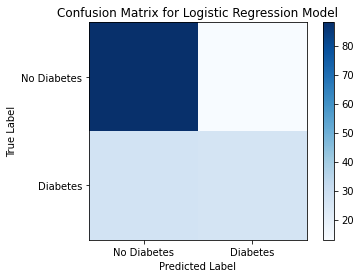

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred_logreg)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


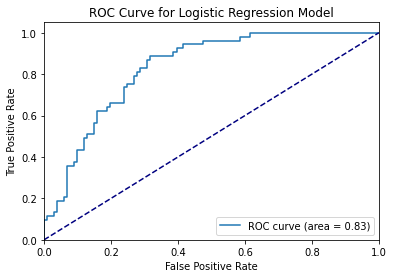

In [38]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Logistic Regression Model")
plt.legend(loc="lower right")
plt.show()


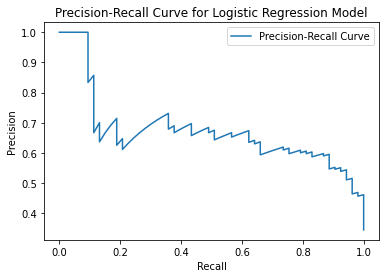

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, logreg.predict_proba(x_test)[:, 1])

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall Curve for Logistic Regression Model")
plt.legend()
plt.show()



In [40]:
from pickle import dump
from pickle import load

dump(logreg, open('logreg.sav', 'wb'))

In [41]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is A4F6-F8F8

 Directory of D:\Diabetesapplication

24/12/2023  10:17    <DIR>          .
23/12/2023  22:30    <DIR>          .ipynb_checkpoints
23/12/2023  22:30                 0 appUpdated.py
23/12/2023  21:44    <DIR>          catboost_info
23/12/2023  18:33            23,873 diabetes.csv
24/12/2023  10:16           725,735 DiabetesDemo.ipynb
24/12/2023  10:17               739 logreg.sav
               4 File(s)        750,347 bytes
               3 Dir(s)  40,562,200,576 bytes free


In [42]:
loaded_model = load(open('logreg.sav', 'rb'))
result = loaded_model.score(X, Y)
print(result)

0.7734375


# DEPLOY THE MODEL

In [31]:
!streamlit run appUpdated.py

^C
